# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Fine-Tuning DistilBERT for Multi-Label Classification

YouTube Video: https://youtu.be/ZYc9za75Chk

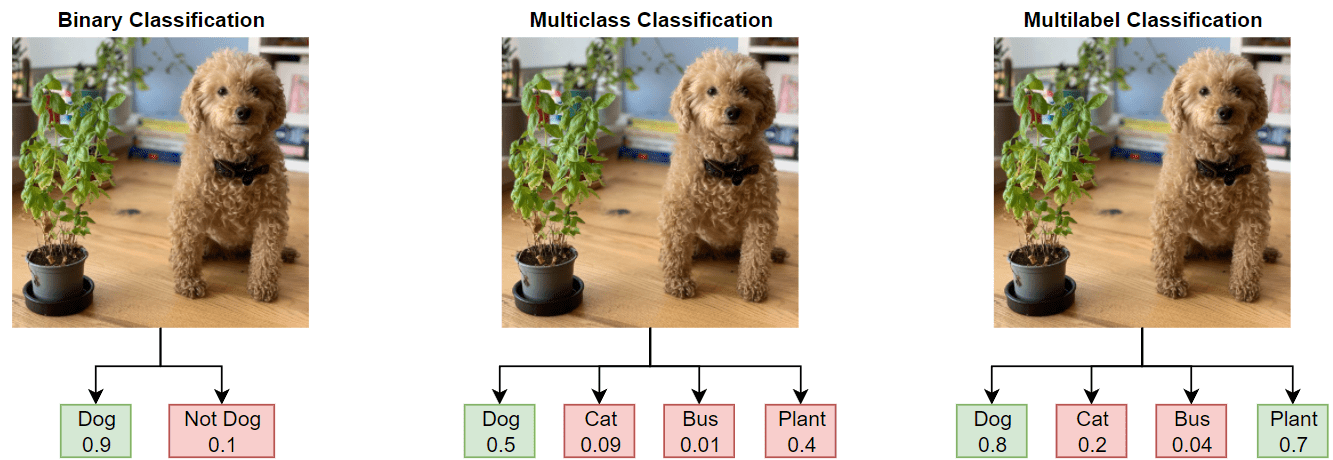

https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/blob/master/IMDB-Movie-Data.csv

https://huggingface.co/

In [1]:
# !pip install -U accelerate
# !pip install -U transformers

In [2]:
# # Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
%cd ../../

d:\python\Toxic-comment-classification


In [4]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 128
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 4
EPOCHS = 1
LEARNING_RATE = 1e-05

In [5]:
path = 'kaggle/input/'
submission_path = 'kaggle/working/transformers/'
comp = 'jigsaw-toxic-comment-classification-challenge/'
clean_data_path = 'clean_data/'
TRAIN_DATA_FILE=f'{path}{comp}train.csv.zip'
TEST_DATA_FILE=f'{path}{comp}test.csv.zip'
CLEAN_TRAIN_DATA_FILE=f'{clean_data_path}data_train_cleaned_vanilla2.txt'
CLEAN_TEST_DATA_FILE=f'{clean_data_path}data_test_cleaned_vanilla2.txt'
SAMPLE_SUBMISSION=f'{path}{comp}sample_submission.csv.zip'
checkpoint_path = 'model_checkpoint/transformers/'

In [6]:
def read_from_file(filename):
    with open(filename, 'r') as f:
        return f.read().splitlines()  

In [7]:
import pandas as pd
import numpy as np

new_df = pd.DataFrame()
train = pd.read_csv(TRAIN_DATA_FILE)
new_df['text'] = read_from_file(CLEAN_TRAIN_DATA_FILE)
new_df['labels'] = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values.tolist()
new_df['labels'] = new_df['labels'].apply(lambda x: [int(label) for label in x])

In [8]:
new_df.head()

text              labels
0  explanation why the edits made under my userna...  [0, 0, 0, 0, 0, 0]
1  daww he matches this background colour i am se...  [0, 0, 0, 0, 0, 0]
2  hey man i am really not trying to edit war it ...  [0, 0, 0, 0, 0, 0]
3  more i cannot make any real suggestions on imp...  [0, 0, 0, 0, 0, 0]
4  you sir are my hero any chance you remember wh...  [0, 0, 0, 0, 0, 0]

## Label Encoder

In [9]:
# from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
# multilabel = MultiLabelBinarizer()

# labels = multilabel.fit_transform(df['Genre']).astype('float32')

# texts = df['Description'].tolist()


In [11]:
# labels
# texts[:5]

## Model Building

In [12]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from torch.utils.data import Dataset

In [13]:
checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(new_df.labels[0]),
                                                            problem_type="multi_label_classification")

d:\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [15]:
class CustomDataset(Dataset):
  def __init__(self, dataframe, tokenizer, max_len=128):
    self.texts = dataframe.text
    self.labels = dataframe.labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx], dtype=torch.float32)

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
        'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),
        'labels': label
    }

In [16]:
# Creating the dataset and dataloader for the neural network

train_size = 0.9
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

# training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)
# testing_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

training_set = CustomDataset(train_data, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_data, tokenizer, MAX_LEN)

FULL Dataset: (159571, 2)
TRAIN Dataset: (143614, 2)
TEST Dataset: (15957, 2)


In [17]:
# val_dataset[0]

In [18]:
# Multi-Label Classification Evaluation Metrics
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, hamming_loss
from transformers import EvalPrediction
import torch


def multi_labels_metrics(predictions, labels, threshold=0.3):
  sigmoid = torch.nn.Sigmoid()
  probs = sigmoid(torch.Tensor(predictions))

  y_pred = np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)] = 1
  y_true = labels

  f1 = f1_score(y_true, y_pred, average = 'macro')
  roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
  hamming = hamming_loss(y_true, y_pred)

  metrics = {
      "roc_auc": roc_auc,
      "hamming_loss": hamming,
      "f1": f1
  }

  return metrics

def compute_metrics(p:EvalPrediction):
  preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

  result = multi_labels_metrics(predictions=preds,
                                labels=p.label_ids)

  return result

In [19]:
# Training Arguments
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir = './results',
    num_train_epochs=1,
    save_steps=1000,
    save_total_limit=2
)

trainer = Trainer(model=model,
                  args=args,
                  train_dataset=training_set,
                  eval_dataset = testing_set,
                  compute_metrics=compute_metrics)

In [20]:
trainer.train()

  0%|          | 0/17952 [00:00<?, ?it/s]

C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0892, 'grad_norm': 0.274988055229187, 'learning_rate': 4.860739750445633e-05, 'epoch': 0.03}
{'loss': 0.0647, 'grad_norm': 2.0308146476745605, 'learning_rate': 4.721479500891266e-05, 'epoch': 0.06}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0543, 'grad_norm': 0.03047400712966919, 'learning_rate': 4.582219251336899e-05, 'epoch': 0.08}
{'loss': 0.0612, 'grad_norm': 0.43905141949653625, 'learning_rate': 4.442959001782531e-05, 'epoch': 0.11}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0513, 'grad_norm': 0.026622092351317406, 'learning_rate': 4.303698752228164e-05, 'epoch': 0.14}
{'loss': 0.054, 'grad_norm': 0.567355751991272, 'learning_rate': 4.164438502673797e-05, 'epoch': 0.17}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0484, 'grad_norm': 0.4708719253540039, 'learning_rate': 4.02517825311943e-05, 'epoch': 0.19}
{'loss': 0.0526, 'grad_norm': 0.8636255860328674, 'learning_rate': 3.885918003565063e-05, 'epoch': 0.22}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0537, 'grad_norm': 0.32891201972961426, 'learning_rate': 3.7466577540106956e-05, 'epoch': 0.25}
{'loss': 0.0493, 'grad_norm': 0.11525127291679382, 'learning_rate': 3.6073975044563276e-05, 'epoch': 0.28}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0489, 'grad_norm': 0.40505295991897583, 'learning_rate': 3.468137254901961e-05, 'epoch': 0.31}
{'loss': 0.0529, 'grad_norm': 1.1038609743118286, 'learning_rate': 3.328877005347594e-05, 'epoch': 0.33}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0457, 'grad_norm': 0.6228684782981873, 'learning_rate': 3.1896167557932265e-05, 'epoch': 0.36}
{'loss': 0.048, 'grad_norm': 0.7373648285865784, 'learning_rate': 3.0503565062388596e-05, 'epoch': 0.39}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0466, 'grad_norm': 1.374070644378662, 'learning_rate': 2.9110962566844923e-05, 'epoch': 0.42}
{'loss': 0.0485, 'grad_norm': 0.21530131995677948, 'learning_rate': 2.7718360071301247e-05, 'epoch': 0.45}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0457, 'grad_norm': 0.8951879739761353, 'learning_rate': 2.6325757575757575e-05, 'epoch': 0.47}
{'loss': 0.0414, 'grad_norm': 0.019407862797379494, 'learning_rate': 2.4933155080213906e-05, 'epoch': 0.5}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0431, 'grad_norm': 0.005971826147288084, 'learning_rate': 2.3540552584670233e-05, 'epoch': 0.53}
{'loss': 0.0459, 'grad_norm': 0.14659424126148224, 'learning_rate': 2.214795008912656e-05, 'epoch': 0.56}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0413, 'grad_norm': 1.285935640335083, 'learning_rate': 2.0755347593582888e-05, 'epoch': 0.58}
{'loss': 0.0447, 'grad_norm': 1.2124303579330444, 'learning_rate': 1.936274509803922e-05, 'epoch': 0.61}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0444, 'grad_norm': 0.593298077583313, 'learning_rate': 1.7970142602495543e-05, 'epoch': 0.64}
{'loss': 0.0406, 'grad_norm': 0.4921715557575226, 'learning_rate': 1.6577540106951873e-05, 'epoch': 0.67}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0426, 'grad_norm': 0.20302322506904602, 'learning_rate': 1.51849376114082e-05, 'epoch': 0.7}
{'loss': 0.0382, 'grad_norm': 0.16043789684772491, 'learning_rate': 1.3792335115864526e-05, 'epoch': 0.72}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0477, 'grad_norm': 0.9289186596870422, 'learning_rate': 1.2399732620320855e-05, 'epoch': 0.75}
{'loss': 0.0408, 'grad_norm': 0.06835892796516418, 'learning_rate': 1.1007130124777185e-05, 'epoch': 0.78}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0414, 'grad_norm': 0.6066699624061584, 'learning_rate': 9.614527629233512e-06, 'epoch': 0.81}
{'loss': 0.0415, 'grad_norm': 1.2320642471313477, 'learning_rate': 8.22192513368984e-06, 'epoch': 0.84}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0406, 'grad_norm': 0.7149856686592102, 'learning_rate': 6.829322638146168e-06, 'epoch': 0.86}
{'loss': 0.0414, 'grad_norm': 0.3654956817626953, 'learning_rate': 5.436720142602496e-06, 'epoch': 0.89}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0406, 'grad_norm': 0.2994503080844879, 'learning_rate': 4.044117647058824e-06, 'epoch': 0.92}
{'loss': 0.0429, 'grad_norm': 0.12964031100273132, 'learning_rate': 2.651515151515152e-06, 'epoch': 0.95}


C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


{'loss': 0.0436, 'grad_norm': 0.6407487988471985, 'learning_rate': 1.2589126559714794e-06, 'epoch': 0.97}
{'train_runtime': 2178.5475, 'train_samples_per_second': 65.922, 'train_steps_per_second': 8.24, 'train_loss': 0.04773167397249191, 'epoch': 1.0}


TrainOutput(global_step=17952, training_loss=0.04773167397249191, metrics={'train_runtime': 2178.5475, 'train_samples_per_second': 65.922, 'train_steps_per_second': 8.24, 'total_flos': 4756382516763648.0, 'train_loss': 0.04773167397249191, 'epoch': 1.0})

In [21]:
trainer.evaluate()

C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten(), dtype=torch.long),
C:\Users\tu7ph\AppData\Local\Temp\ipykernel_31460\1015208006.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten(), dtype=torch.long),


  0%|          | 0/1995 [00:00<?, ?it/s]

{'eval_loss': 0.04067183658480644,
 'eval_roc_auc': 0.8424175584498296,
 'eval_hamming_loss': 0.017944057989179252,
 'eval_f1': 0.6596558015194275,
 'eval_runtime': 63.2535,
 'eval_samples_per_second': 252.271,
 'eval_steps_per_second': 31.54,
 'epoch': 1.0}

In [22]:
trainer.save_model("distilbert-finetuned-imdb-multi-label")

# Predictions

In [23]:
text = "I hate you"

encoding = tokenizer(text, return_tensors='pt')
encoding.to(trainer.model.device)

outputs = trainer.model(**encoding)

In [24]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())
preds = np.zeros(probs.shape)
preds[np.where(probs>=0.3)] = 1

In [25]:
preds.reshape(1,-1)

array([[1., 0., 0., 0., 0., 0.]])